In [27]:
import torch
import numpy as np
import pandas as pd
import glob
import os
import copy
import q_dev_fns
%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
Q = torch.load('saved_networks/adult_pretrained_Q_network.torch')
Q.eval()
    
# freeze it
for p in Q.parameters():
    p.requires_grad = True

In [17]:
NUM_CATEG = 11
SLICE_LEN = 16384
device="cpu"
vocab = "she had your suit in dark greasy wash water all year".split(' ')+['UNK']
test_folder = "/home/stephan/notebooks/ciwganfiwgan-pytorch/run_log/29_MWE_labelsFixed/4075"
Q2_ENTROPY_THRESHOLD = 10000
Q = Q.to(device)

In [18]:
def get_plot_for_epoch(test_folder, vocab):
    X, Y, filenames  = q_dev_fns.load_wavs_and_labels(test_folder, SLICE_LEN, NUM_CATEG, device, vocab)
    Q_vals = torch.nn.Softmax(dim=1)(Q(X))
    Q_vals_with_unks = q_dev_fns.mark_unks_in_Q(Q_vals, Q2_ENTROPY_THRESHOLD, device)
    recognition_results = q_dev_fns.evaluate_asr_system(Q_vals_with_unks, Y, device, vocab, filenames)
    rr = recognition_results['df']
    %R -i rr
    %R names(rr)[1:2] = c('human_label', 'asr_system_label')
    %R rr_agg = aggregate(matches ~ asr_system_label + human_label, rr, length)
    %R rr_total = aggregate(matches ~ human_label, rr, length)
    %R names(rr_total) = c('human_label','human_label_total')
    %R rr_agg = merge(rr_agg, rr_total)
    %R rr_agg$prop = rr_agg$matches / rr_agg$human_label_total 
    %R print(ggplot(rr_agg ) + geom_bar(aes(x = human_label, y = prop, fill=asr_system_label, group=prop),  stat = "identity"))

100%|██████████| 192/192 [00:00<00:00, 4308.20it/s]
/home/stephan/notebooks/ciwganfiwgan-pytorch/gasper-gan-env/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "human label". Fall back to string conversion. The error is: <class 'numpy.str_'>
  warnings.warn('Error while trying to convert '
/home/stephan/notebooks/ciwganfiwgan-pytorch/gasper-gan-env/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "asr system label". Fall back to string conversion. The error is: <class 'numpy.str_'>
  warnings.warn('Error while trying to convert '


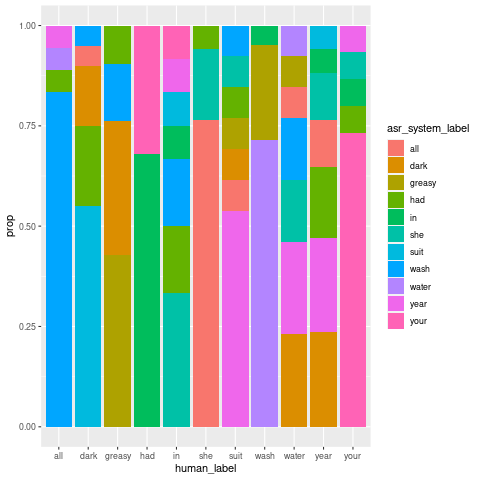

In [19]:
get_plot_for_epoch(test_folder, vocab)

In [60]:
# composition of the vocabualry over time -- point it at a directory with many epochs

In [79]:
Q = torch.load('saved_networks/adult_pretrained_Q_network_4.torch')
Q.eval()
    
# freeze it
for p in Q.parameters():
    p.requires_grad = True

In [85]:
NUM_CATEG = 11
SLICE_LEN = 16384
device="cpu"
vocab = "dark greasy water year".split(' ')+['UNK']
epochs_folder = "/home/stephan/notebooks/ciwganfiwgan-pytorch/temp"
Q2_ENTROPY_THRESHOLD = 10000
Q = Q.to(device)

In [86]:
def get_plot_across_epochs(epochs_folder, vocab):
    across_epochs = []
    epoch_folders = glob.glob(os.path.join(epochs_folder,'[0-9]*'))
    for epoch_folder in epoch_folders:  
        print(epoch_folder)
        X, Y, filenames  = q_dev_fns.load_wavs_and_labels(epoch_folder, SLICE_LEN, NUM_CATEG, device, vocab)
        Q_vals = torch.nn.Softmax(dim=1)(Q(X))
        print(Q_vals.shape)
        Q_vals_with_unks = q_dev_fns.mark_unks_in_Q(Q_vals, Q2_ENTROPY_THRESHOLD, device)
        recognition_results = q_dev_fns.evaluate_asr_system(Q_vals_with_unks, Y, device, vocab, filenames)
        df = copy.copy(recognition_results['df'])
        df['epoch'] = int(os.path.basename(os.path.normpath(epoch_folder)))
        across_epochs.append(df)
    rr = pd.concat(across_epochs)
    return(rr)
  

In [106]:
%pdb

rr = get_plot_across_epochs(epochs_folder, vocab)

Automatic pdb calling has been turned ON
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1140


100%|██████████| 192/192 [00:00<00:00, 1286.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1730


100%|██████████| 192/192 [00:00<00:00, 7339.11it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/480


100%|██████████| 192/192 [00:00<00:00, 1186.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/660


100%|██████████| 192/192 [00:00<00:00, 1783.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1680


100%|██████████| 192/192 [00:00<00:00, 5553.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1100


100%|██████████| 192/192 [00:00<00:00, 1247.79it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1470


100%|██████████| 192/192 [00:00<00:00, 1271.31it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/350


100%|██████████| 192/192 [00:00<00:00, 1566.00it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1875


100%|██████████| 192/192 [00:00<00:00, 4503.14it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2575


100%|██████████| 192/192 [00:00<00:00, 7260.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2520


100%|██████████| 192/192 [00:00<00:00, 5971.87it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/385


100%|██████████| 192/192 [00:00<00:00, 1570.33it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/555


100%|██████████| 192/192 [00:00<00:00, 1543.22it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2055


100%|██████████| 192/192 [00:00<00:00, 7793.84it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2120


100%|██████████| 192/192 [00:00<00:00, 7191.07it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1005


100%|██████████| 192/192 [00:00<00:00, 1371.81it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1800


100%|██████████| 192/192 [00:00<00:00, 6890.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1675


100%|██████████| 192/192 [00:00<00:00, 7436.98it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/875


100%|██████████| 192/192 [00:00<00:00, 1358.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1200


100%|██████████| 192/192 [00:00<00:00, 1262.34it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2015


100%|██████████| 192/192 [00:00<00:00, 5734.04it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/990


100%|██████████| 192/192 [00:00<00:00, 1241.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1450


100%|██████████| 192/192 [00:00<00:00, 1413.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/155


100%|██████████| 192/192 [00:00<00:00, 1827.46it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1825


100%|██████████| 192/192 [00:00<00:00, 7460.41it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2615


100%|██████████| 192/192 [00:00<00:00, 5546.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1230


100%|██████████| 192/192 [00:00<00:00, 2358.88it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1425


100%|██████████| 192/192 [00:00<00:00, 1260.42it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/545


100%|██████████| 192/192 [00:00<00:00, 1683.39it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1905


100%|██████████| 192/192 [00:00<00:00, 5299.74it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2430


100%|██████████| 192/192 [00:00<00:00, 5680.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1745


100%|██████████| 192/192 [00:00<00:00, 7355.94it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1740


100%|██████████| 192/192 [00:00<00:00, 3895.21it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/825


100%|██████████| 192/192 [00:00<00:00, 1373.52it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1440


100%|██████████| 192/192 [00:00<00:00, 2091.09it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1510


100%|██████████| 192/192 [00:00<00:00, 1203.84it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/265


100%|██████████| 192/192 [00:00<00:00, 1299.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/335


100%|██████████| 192/192 [00:00<00:00, 1575.92it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1640


100%|██████████| 192/192 [00:00<00:00, 1662.69it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/280


100%|██████████| 192/192 [00:00<00:00, 1278.31it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2830


100%|██████████| 192/192 [00:00<00:00, 4823.81it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/630


100%|██████████| 192/192 [00:00<00:00, 1739.39it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2685


100%|██████████| 192/192 [00:00<00:00, 7238.77it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1075


100%|██████████| 192/192 [00:00<00:00, 1477.78it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1155


100%|██████████| 192/192 [00:00<00:00, 1376.68it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2350


100%|██████████| 192/192 [00:00<00:00, 6826.02it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2075


100%|██████████| 192/192 [00:00<00:00, 4770.97it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/325


100%|██████████| 192/192 [00:00<00:00, 1186.23it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/20


100%|██████████| 192/192 [00:00<00:00, 1149.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1105


100%|██████████| 192/192 [00:00<00:00, 1212.62it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2535


100%|██████████| 192/192 [00:00<00:00, 5092.98it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1690


100%|██████████| 192/192 [00:00<00:00, 6196.62it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/830


100%|██████████| 192/192 [00:00<00:00, 1266.85it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/675


100%|██████████| 192/192 [00:00<00:00, 1357.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2835


100%|██████████| 192/192 [00:00<00:00, 7690.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2010


100%|██████████| 192/192 [00:00<00:00, 6874.97it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1515


100%|██████████| 192/192 [00:00<00:00, 1144.29it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/285


100%|██████████| 192/192 [00:00<00:00, 1374.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2125


100%|██████████| 192/192 [00:00<00:00, 4477.90it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1265


100%|██████████| 192/192 [00:00<00:00, 1310.15it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/905


100%|██████████| 192/192 [00:00<00:00, 1704.20it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2230


100%|██████████| 192/192 [00:00<00:00, 4003.93it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/600


100%|██████████| 192/192 [00:00<00:00, 1325.54it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1990


100%|██████████| 192/192 [00:00<00:00, 3641.99it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/620


100%|██████████| 192/192 [00:00<00:00, 1278.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/360


100%|██████████| 192/192 [00:00<00:00, 1527.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1025


100%|██████████| 192/192 [00:00<00:00, 1229.09it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2760


100%|██████████| 192/192 [00:00<00:00, 5135.46it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2150


100%|██████████| 192/192 [00:00<00:00, 4718.17it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2515


100%|██████████| 192/192 [00:00<00:00, 7713.96it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2100


100%|██████████| 192/192 [00:00<00:00, 3843.96it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1420


100%|██████████| 192/192 [00:00<00:00, 1610.65it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2555


100%|██████████| 192/192 [00:00<00:00, 4558.95it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/960


100%|██████████| 192/192 [00:00<00:00, 1345.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/640


100%|██████████| 192/192 [00:00<00:00, 1156.01it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1480


100%|██████████| 192/192 [00:00<00:00, 1318.32it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/850


100%|██████████| 192/192 [00:00<00:00, 1124.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2530


100%|██████████| 192/192 [00:00<00:00, 6945.83it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/800


100%|██████████| 192/192 [00:00<00:00, 1182.46it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/700


100%|██████████| 192/192 [00:00<00:00, 1205.52it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1465


100%|██████████| 192/192 [00:00<00:00, 1227.13it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1970


100%|██████████| 192/192 [00:00<00:00, 7107.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/770


100%|██████████| 192/192 [00:00<00:00, 1429.37it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/530


100%|██████████| 192/192 [00:00<00:00, 1390.53it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2115


100%|██████████| 192/192 [00:00<00:00, 4858.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/750


100%|██████████| 192/192 [00:00<00:00, 1434.90it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1010


100%|██████████| 192/192 [00:00<00:00, 1399.49it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/290


100%|██████████| 192/192 [00:00<00:00, 1293.48it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1085


100%|██████████| 192/192 [00:00<00:00, 1330.25it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2655


100%|██████████| 192/192 [00:00<00:00, 7588.07it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/180


100%|██████████| 192/192 [00:00<00:00, 2185.41it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1540


100%|██████████| 192/192 [00:00<00:00, 1188.21it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1635


100%|██████████| 192/192 [00:00<00:00, 1103.95it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2140


100%|██████████| 192/192 [00:00<00:00, 5019.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1380


100%|██████████| 192/192 [00:00<00:00, 1775.73it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/935


100%|██████████| 192/192 [00:00<00:00, 1300.66it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2790


100%|██████████| 192/192 [00:00<00:00, 7518.36it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2085


100%|██████████| 192/192 [00:00<00:00, 4989.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2285


100%|██████████| 192/192 [00:00<00:00, 7075.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/715


100%|██████████| 192/192 [00:00<00:00, 2090.43it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1080


100%|██████████| 192/192 [00:00<00:00, 1258.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2155


100%|██████████| 192/192 [00:00<00:00, 4019.04it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/880


100%|██████████| 192/192 [00:00<00:00, 1339.08it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2275


100%|██████████| 192/192 [00:00<00:00, 6432.83it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1315


100%|██████████| 192/192 [00:00<00:00, 4723.07it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2840


100%|██████████| 192/192 [00:00<00:00, 7129.25it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2815


100%|██████████| 192/192 [00:00<00:00, 6413.77it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/465


100%|██████████| 192/192 [00:00<00:00, 1158.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2395


100%|██████████| 192/192 [00:00<00:00, 5215.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2305


100%|██████████| 192/192 [00:00<00:00, 6637.32it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/485


100%|██████████| 192/192 [00:00<00:00, 1696.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/495


100%|██████████| 192/192 [00:00<00:00, 1188.64it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2035


100%|██████████| 192/192 [00:00<00:00, 5268.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2235


100%|██████████| 192/192 [00:00<00:00, 7407.64it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1505


100%|██████████| 192/192 [00:00<00:00, 1246.36it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1520


100%|██████████| 192/192 [00:00<00:00, 1272.94it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2180


100%|██████████| 192/192 [00:00<00:00, 7250.57it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/140


100%|██████████| 192/192 [00:00<00:00, 1183.50it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1240


100%|██████████| 192/192 [00:00<00:00, 1088.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2725


100%|██████████| 192/192 [00:00<00:00, 7585.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/40


100%|██████████| 192/192 [00:00<00:00, 1172.22it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/455


100%|██████████| 192/192 [00:00<00:00, 1352.33it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2020


100%|██████████| 192/192 [00:00<00:00, 7278.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/775


100%|██████████| 192/192 [00:00<00:00, 1141.88it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2805


100%|██████████| 192/192 [00:00<00:00, 5299.46it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/565


100%|██████████| 192/192 [00:00<00:00, 1387.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2435


100%|██████████| 192/192 [00:00<00:00, 5315.69it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1935


100%|██████████| 192/192 [00:00<00:00, 7019.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2490


100%|██████████| 192/192 [00:00<00:00, 7521.31it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2800


100%|██████████| 192/192 [00:00<00:00, 6398.23it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1060


100%|██████████| 192/192 [00:00<00:00, 1322.02it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/150


100%|██████████| 192/192 [00:00<00:00, 715.93it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2345


100%|██████████| 192/192 [00:00<00:00, 6933.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/665


100%|██████████| 192/192 [00:00<00:00, 1217.57it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/615


100%|██████████| 192/192 [00:00<00:00, 1143.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2280


100%|██████████| 192/192 [00:00<00:00, 7320.97it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/845


100%|██████████| 192/192 [00:00<00:00, 1467.60it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/895


100%|██████████| 192/192 [00:00<00:00, 1196.28it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2295


100%|██████████| 192/192 [00:00<00:00, 5823.40it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2190


100%|██████████| 192/192 [00:00<00:00, 4049.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/245


100%|██████████| 192/192 [00:00<00:00, 1374.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1455


100%|██████████| 192/192 [00:00<00:00, 2543.93it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1120


100%|██████████| 192/192 [00:00<00:00, 1362.73it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/35


100%|██████████| 192/192 [00:00<00:00, 1257.72it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2220


100%|██████████| 192/192 [00:00<00:00, 5420.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2480


100%|██████████| 192/192 [00:00<00:00, 7683.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1685


100%|██████████| 192/192 [00:00<00:00, 7052.21it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/10


100%|██████████| 192/192 [00:00<00:00, 1047.46it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2265


100%|██████████| 192/192 [00:00<00:00, 7619.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2325


100%|██████████| 192/192 [00:00<00:00, 3773.00it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2765


100%|██████████| 192/192 [00:00<00:00, 7098.78it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2525


100%|██████████| 192/192 [00:00<00:00, 7125.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2570


100%|██████████| 192/192 [00:00<00:00, 5491.35it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2595


100%|██████████| 192/192 [00:00<00:00, 5074.11it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1015


100%|██████████| 192/192 [00:00<00:00, 1128.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/835


100%|██████████| 192/192 [00:00<00:00, 1161.16it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2240


100%|██████████| 192/192 [00:00<00:00, 3863.31it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/145


100%|██████████| 192/192 [00:00<00:00, 1137.98it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/5


100%|██████████| 192/192 [00:00<00:00, 1314.62it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/900


100%|██████████| 192/192 [00:00<00:00, 1329.37it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/355


100%|██████████| 192/192 [00:00<00:00, 1449.64it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1350


100%|██████████| 192/192 [00:00<00:00, 4179.00it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/345


100%|██████████| 192/192 [00:00<00:00, 1182.21it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2105


100%|██████████| 192/192 [00:00<00:00, 4532.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2365


100%|██████████| 192/192 [00:00<00:00, 5466.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/250


100%|██████████| 192/192 [00:00<00:00, 1166.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/305


100%|██████████| 192/192 [00:00<00:00, 1268.87it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1035


100%|██████████| 192/192 [00:00<00:00, 1272.00it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2070


100%|██████████| 192/192 [00:00<00:00, 5693.02it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/370


100%|██████████| 192/192 [00:00<00:00, 1527.23it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2390


100%|██████████| 192/192 [00:00<00:00, 6519.75it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2165


100%|██████████| 192/192 [00:00<00:00, 5151.98it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2445


100%|██████████| 192/192 [00:00<00:00, 7532.21it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/870


100%|██████████| 192/192 [00:00<00:00, 1371.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2450


100%|██████████| 192/192 [00:00<00:00, 4058.55it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1865


100%|██████████| 192/192 [00:00<00:00, 7744.22it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/440


100%|██████████| 192/192 [00:00<00:00, 1158.57it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2540


100%|██████████| 192/192 [00:00<00:00, 4825.31it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/30


100%|██████████| 192/192 [00:00<00:00, 1428.20it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1490


100%|██████████| 192/192 [00:00<00:00, 1481.73it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1365


100%|██████████| 192/192 [00:00<00:00, 1309.96it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/610


100%|██████████| 192/192 [00:00<00:00, 1269.74it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/260


100%|██████████| 192/192 [00:00<00:00, 1324.85it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1255


100%|██████████| 192/192 [00:00<00:00, 2140.11it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1830


100%|██████████| 192/192 [00:00<00:00, 7584.57it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1430


100%|██████████| 192/192 [00:00<00:00, 1247.42it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1575


100%|██████████| 192/192 [00:00<00:00, 1158.34it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2160


100%|██████████| 192/192 [00:00<00:00, 7109.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1945


100%|██████████| 192/192 [00:00<00:00, 7213.29it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1050


100%|██████████| 192/192 [00:00<00:00, 1149.37it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2050


100%|██████████| 192/192 [00:00<00:00, 5411.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1810


100%|██████████| 192/192 [00:00<00:00, 6975.67it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/840


100%|██████████| 192/192 [00:00<00:00, 1234.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2755


100%|██████████| 192/192 [00:00<00:00, 7561.28it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/130


100%|██████████| 192/192 [00:00<00:00, 1401.99it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/980


100%|██████████| 192/192 [00:00<00:00, 1358.90it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/400


100%|██████████| 192/192 [00:00<00:00, 1366.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1880


100%|██████████| 192/192 [00:00<00:00, 6100.94it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/890


100%|██████████| 192/192 [00:00<00:00, 1258.28it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1055


100%|██████████| 192/192 [00:00<00:00, 1245.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1175


100%|██████████| 192/192 [00:00<00:00, 1292.05it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1930


100%|██████████| 192/192 [00:00<00:00, 5798.62it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/75


100%|██████████| 192/192 [00:00<00:00, 1161.77it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2135


100%|██████████| 192/192 [00:00<00:00, 5499.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/300


100%|██████████| 192/192 [00:00<00:00, 1108.13it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1695


100%|██████████| 192/192 [00:00<00:00, 6071.41it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2495


100%|██████████| 192/192 [00:00<00:00, 7506.79it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/100


100%|██████████| 192/192 [00:00<00:00, 1230.81it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1485


100%|██████████| 192/192 [00:00<00:00, 1285.99it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/585


100%|██████████| 192/192 [00:00<00:00, 1254.25it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/970


100%|██████████| 192/192 [00:00<00:00, 1267.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1590


100%|██████████| 192/192 [00:00<00:00, 1275.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1385


100%|██████████| 192/192 [00:00<00:00, 1237.87it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/195


100%|██████████| 192/192 [00:00<00:00, 1174.01it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1070


100%|██████████| 192/192 [00:00<00:00, 1271.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1920


100%|██████████| 192/192 [00:00<00:00, 6853.85it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/805


100%|██████████| 192/192 [00:00<00:00, 1207.18it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1855


100%|██████████| 192/192 [00:00<00:00, 7530.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2440


100%|██████████| 192/192 [00:00<00:00, 7580.92it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1940


100%|██████████| 192/192 [00:00<00:00, 7488.57it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1625


100%|██████████| 192/192 [00:00<00:00, 1709.02it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2545


100%|██████████| 192/192 [00:00<00:00, 5386.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/510


100%|██████████| 192/192 [00:00<00:00, 1112.54it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1065


100%|██████████| 192/192 [00:00<00:00, 1177.55it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1395


100%|██████████| 192/192 [00:00<00:00, 1724.37it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2375


100%|██████████| 192/192 [00:00<00:00, 6883.31it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1790


100%|██████████| 192/192 [00:00<00:00, 7725.35it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/575


100%|██████████| 192/192 [00:00<00:00, 1137.13it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/45


100%|██████████| 192/192 [00:00<00:00, 1130.33it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2400


100%|██████████| 192/192 [00:00<00:00, 4276.65it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/170


100%|██████████| 192/192 [00:00<00:00, 1418.39it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2005


100%|██████████| 192/192 [00:00<00:00, 4782.90it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/690


100%|██████████| 192/192 [00:00<00:00, 1175.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1725


100%|██████████| 192/192 [00:00<00:00, 5116.79it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/525


100%|██████████| 192/192 [00:00<00:00, 1208.80it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2260


100%|██████████| 192/192 [00:00<00:00, 4457.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/580


100%|██████████| 192/192 [00:00<00:00, 1163.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/910


100%|██████████| 192/192 [00:00<00:00, 1450.94it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2845


100%|██████████| 192/192 [00:00<00:00, 7523.13it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2630


100%|██████████| 192/192 [00:00<00:00, 7662.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2500


100%|██████████| 192/192 [00:00<00:00, 3991.74it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1330


100%|██████████| 192/192 [00:00<00:00, 2918.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2300


100%|██████████| 192/192 [00:00<00:00, 6956.09it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2675


100%|██████████| 192/192 [00:00<00:00, 3800.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1185


100%|██████████| 192/192 [00:00<00:00, 1339.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2175


100%|██████████| 192/192 [00:00<00:00, 5090.69it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2820


100%|██████████| 192/192 [00:00<00:00, 7552.48it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2650


100%|██████████| 192/192 [00:00<00:00, 6347.84it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/310


100%|██████████| 192/192 [00:00<00:00, 1534.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1370


100%|██████████| 192/192 [00:00<00:00, 2078.16it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/210


100%|██████████| 192/192 [00:00<00:00, 2067.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/570


100%|██████████| 192/192 [00:00<00:00, 1424.43it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/605


100%|██████████| 192/192 [00:00<00:00, 1188.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1995


100%|██████████| 192/192 [00:00<00:00, 5954.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1585


100%|██████████| 192/192 [00:00<00:00, 1385.83it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2810


100%|██████████| 192/192 [00:00<00:00, 5728.50it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2410


100%|██████████| 192/192 [00:00<00:00, 4177.85it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1210


100%|██████████| 192/192 [00:00<00:00, 1381.55it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1135


100%|██████████| 192/192 [00:00<00:00, 1503.07it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1895


100%|██████████| 192/192 [00:00<00:00, 4612.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1095


100%|██████████| 192/192 [00:00<00:00, 1207.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/60


100%|██████████| 192/192 [00:00<00:00, 1142.55it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1630


100%|██████████| 192/192 [00:00<00:00, 1053.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/730


100%|██████████| 192/192 [00:00<00:00, 1247.38it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/795


100%|██████████| 192/192 [00:00<00:00, 1184.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1660


100%|██████████| 192/192 [00:00<00:00, 7354.06it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/810


100%|██████████| 192/192 [00:00<00:00, 1221.11it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1860


100%|██████████| 192/192 [00:00<00:00, 4496.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/550


100%|██████████| 192/192 [00:00<00:00, 1170.53it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/635


100%|██████████| 192/192 [00:00<00:00, 1331.47it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/925


100%|██████████| 192/192 [00:00<00:00, 1357.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1885


100%|██████████| 192/192 [00:00<00:00, 6906.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1850


100%|██████████| 192/192 [00:00<00:00, 7260.11it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2425


100%|██████████| 192/192 [00:00<00:00, 5180.38it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1605


100%|██████████| 192/192 [00:00<00:00, 1244.34it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/520


100%|██████████| 192/192 [00:00<00:00, 1263.73it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/65


100%|██████████| 192/192 [00:00<00:00, 1250.31it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1900


100%|██████████| 192/192 [00:00<00:00, 7162.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1870


100%|██████████| 192/192 [00:00<00:00, 7582.99it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1670


100%|██████████| 192/192 [00:00<00:00, 7326.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/135


100%|██████████| 192/192 [00:00<00:00, 1246.41it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2245


100%|██████████| 192/192 [00:00<00:00, 4761.75it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1915


100%|██████████| 192/192 [00:00<00:00, 5789.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2770


100%|██████████| 192/192 [00:00<00:00, 4850.48it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1090


100%|██████████| 192/192 [00:00<00:00, 1205.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2715


100%|██████████| 192/192 [00:00<00:00, 4871.99it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2775


100%|██████████| 192/192 [00:00<00:00, 6772.00it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2550


100%|██████████| 192/192 [00:00<00:00, 7509.94it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/685


100%|██████████| 192/192 [00:00<00:00, 1165.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1270


100%|██████████| 192/192 [00:00<00:00, 1262.60it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2110


100%|██████████| 192/192 [00:00<00:00, 5167.55it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1495


100%|██████████| 192/192 [00:00<00:00, 1054.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2465


100%|██████████| 192/192 [00:00<00:00, 5272.88it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2510


100%|██████████| 192/192 [00:00<00:00, 5668.38it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2320


100%|██████████| 192/192 [00:00<00:00, 6714.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2205


100%|██████████| 192/192 [00:00<00:00, 7417.12it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1030


100%|██████████| 192/192 [00:00<00:00, 1535.35it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/560


100%|██████████| 192/192 [00:00<00:00, 1147.96it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/735


100%|██████████| 192/192 [00:00<00:00, 1403.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2030


100%|██████████| 192/192 [00:00<00:00, 4616.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1785


100%|██████████| 192/192 [00:00<00:00, 7135.19it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1225


100%|██████████| 192/192 [00:00<00:00, 1225.89it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1215


100%|██████████| 192/192 [00:00<00:00, 1429.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1415


100%|██████████| 192/192 [00:00<00:00, 1253.76it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/295


100%|██████████| 192/192 [00:00<00:00, 1481.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/330


100%|██████████| 192/192 [00:00<00:00, 1220.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1610


100%|██████████| 192/192 [00:00<00:00, 1296.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1320


100%|██████████| 192/192 [00:00<00:00, 1775.77it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2470


100%|██████████| 192/192 [00:00<00:00, 5161.13it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1405


100%|██████████| 192/192 [00:00<00:00, 1346.76it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2605


100%|██████████| 192/192 [00:00<00:00, 5921.54it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/315


100%|██████████| 192/192 [00:00<00:00, 1105.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/765


100%|██████████| 192/192 [00:00<00:00, 1287.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2690


100%|██████████| 192/192 [00:00<00:00, 6850.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/785


100%|██████████| 192/192 [00:00<00:00, 1477.33it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2065


100%|██████████| 192/192 [00:00<00:00, 6552.80it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1345


100%|██████████| 192/192 [00:00<00:00, 1840.53it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1565


100%|██████████| 192/192 [00:00<00:00, 1402.19it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2310


100%|██████████| 192/192 [00:00<00:00, 7321.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/625


100%|██████████| 192/192 [00:00<00:00, 1179.67it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2145


100%|██████████| 192/192 [00:00<00:00, 5687.15it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1435


100%|██████████| 192/192 [00:00<00:00, 1403.05it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2095


100%|██████████| 192/192 [00:00<00:00, 4672.23it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/365


100%|██████████| 192/192 [00:00<00:00, 1180.76it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1170


100%|██████████| 192/192 [00:00<00:00, 1174.29it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1305


100%|██████████| 192/192 [00:00<00:00, 1527.64it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1020


100%|██████████| 192/192 [00:00<00:00, 1226.87it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2485


100%|██████████| 192/192 [00:00<00:00, 3996.52it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/680


100%|██████████| 192/192 [00:00<00:00, 1175.07it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1770


100%|██████████| 192/192 [00:00<00:00, 6950.33it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/945


100%|██████████| 192/192 [00:00<00:00, 1194.87it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1890


100%|██████████| 192/192 [00:00<00:00, 4721.18it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1655


100%|██████████| 192/192 [00:00<00:00, 1372.84it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2250


100%|██████████| 192/192 [00:00<00:00, 4869.52it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2730


100%|██████████| 192/192 [00:00<00:00, 7669.80it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/745


100%|██████████| 192/192 [00:00<00:00, 2226.99it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1910


100%|██████████| 192/192 [00:00<00:00, 7411.45it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/95


100%|██████████| 192/192 [00:00<00:00, 1386.96it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/390


100%|██████████| 192/192 [00:00<00:00, 1248.10it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1980


100%|██████████| 192/192 [00:00<00:00, 7470.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/85


100%|██████████| 192/192 [00:00<00:00, 1230.73it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2130


100%|██████████| 192/192 [00:00<00:00, 7112.88it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/820


100%|██████████| 192/192 [00:00<00:00, 1241.99it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2210


100%|██████████| 192/192 [00:00<00:00, 4881.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2785


100%|██████████| 192/192 [00:00<00:00, 7700.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1925


100%|██████████| 192/192 [00:00<00:00, 7248.16it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/55


100%|██████████| 192/192 [00:00<00:00, 1415.41it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2610


100%|██████████| 192/192 [00:00<00:00, 7536.02it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/790


100%|██████████| 192/192 [00:00<00:00, 1243.66it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1715


100%|██████████| 192/192 [00:00<00:00, 4750.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2705


100%|██████████| 192/192 [00:00<00:00, 4009.23it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/815


100%|██████████| 192/192 [00:00<00:00, 1208.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2315


100%|██████████| 192/192 [00:00<00:00, 7545.69it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/490


100%|██████████| 192/192 [00:00<00:00, 1346.97it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1805


100%|██████████| 192/192 [00:00<00:00, 4779.49it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/415


100%|██████████| 192/192 [00:00<00:00, 1597.32it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2665


100%|██████████| 192/192 [00:00<00:00, 7671.92it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1390


100%|██████████| 192/192 [00:00<00:00, 1334.18it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2625


100%|██████████| 192/192 [00:00<00:00, 5344.87it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1300


100%|██████████| 192/192 [00:00<00:00, 1350.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1840


100%|██████████| 192/192 [00:00<00:00, 5644.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2335


100%|██████████| 192/192 [00:00<00:00, 5162.12it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/340


100%|██████████| 192/192 [00:00<00:00, 1212.68it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1205


100%|██████████| 192/192 [00:00<00:00, 1241.39it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1615


100%|██████████| 192/192 [00:00<00:00, 1320.90it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/780


100%|██████████| 192/192 [00:00<00:00, 1259.10it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/380


100%|██████████| 192/192 [00:00<00:00, 1604.02it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/915


100%|██████████| 192/192 [00:00<00:00, 1328.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1720


100%|██████████| 192/192 [00:00<00:00, 7072.84it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1620


100%|██████████| 192/192 [00:00<00:00, 1137.41it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/460


100%|██████████| 192/192 [00:00<00:00, 1483.99it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2745


100%|██████████| 192/192 [00:00<00:00, 5915.80it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2060


100%|██████████| 192/192 [00:00<00:00, 7414.12it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/435


100%|██████████| 192/192 [00:00<00:00, 1145.42it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1950


100%|██████████| 192/192 [00:00<00:00, 7030.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2040


100%|██████████| 192/192 [00:00<00:00, 7161.40it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/215


100%|██████████| 192/192 [00:00<00:00, 1274.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/755


100%|██████████| 192/192 [00:00<00:00, 1144.98it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1125


100%|██████████| 192/192 [00:00<00:00, 1236.23it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2585


100%|██████████| 192/192 [00:00<00:00, 5868.34it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/165


100%|██████████| 192/192 [00:00<00:00, 2020.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/445


100%|██████████| 192/192 [00:00<00:00, 1149.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2565


100%|██████████| 192/192 [00:00<00:00, 7377.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2825


100%|██████████| 192/192 [00:00<00:00, 7263.85it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1180


100%|██████████| 192/192 [00:00<00:00, 1367.47it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1145


100%|██████████| 192/192 [00:00<00:00, 1165.06it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2645


100%|██████████| 192/192 [00:00<00:00, 7818.36it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1220


100%|██████████| 192/192 [00:00<00:00, 1310.10it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/645


100%|██████████| 192/192 [00:00<00:00, 1232.04it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1775


100%|██████████| 192/192 [00:00<00:00, 7663.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2045


100%|██████████| 192/192 [00:00<00:00, 7083.42it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/425


100%|██████████| 192/192 [00:00<00:00, 2127.43it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1835


100%|██████████| 192/192 [00:00<00:00, 7136.90it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2225


100%|██████████| 192/192 [00:00<00:00, 7173.65it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2590


100%|██████████| 192/192 [00:00<00:00, 6245.20it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/410


100%|██████████| 192/192 [00:00<00:00, 1342.15it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2505


100%|██████████| 192/192 [00:00<00:00, 5496.56it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/655


100%|██████████| 192/192 [00:00<00:00, 1347.67it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/175


100%|██████████| 192/192 [00:00<00:00, 1686.64it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1960


100%|██████████| 192/192 [00:00<00:00, 4991.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1400


100%|██████████| 192/192 [00:00<00:00, 1448.17it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1235


100%|██████████| 192/192 [00:00<00:00, 1312.07it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1355


100%|██████████| 192/192 [00:00<00:00, 2332.85it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/115


100%|██████████| 192/192 [00:00<00:00, 1220.67it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2415


100%|██████████| 192/192 [00:00<00:00, 5561.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1275


100%|██████████| 192/192 [00:00<00:00, 1442.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2710


100%|██████████| 192/192 [00:00<00:00, 7382.65it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/450


100%|██████████| 192/192 [00:00<00:00, 1320.62it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2695


100%|██████████| 192/192 [00:00<00:00, 7225.39it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2700


100%|██████████| 192/192 [00:00<00:00, 6663.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1525


100%|██████████| 192/192 [00:00<00:00, 1138.39it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2195


100%|██████████| 192/192 [00:00<00:00, 4961.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/375


100%|██████████| 192/192 [00:00<00:00, 1699.37it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1570


100%|██████████| 192/192 [00:00<00:00, 1206.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1500


100%|██████████| 192/192 [00:00<00:00, 1562.55it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/120


100%|██████████| 192/192 [00:00<00:00, 1212.12it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2735


100%|██████████| 192/192 [00:00<00:00, 5858.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1645


100%|██████████| 192/192 [00:00<00:00, 1296.13it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2460


100%|██████████| 192/192 [00:00<00:00, 5757.49it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1195


100%|██████████| 192/192 [00:00<00:00, 1433.26it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/595


100%|██████████| 192/192 [00:00<00:00, 1553.23it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/200


100%|██████████| 192/192 [00:00<00:00, 1159.34it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1755


100%|██████████| 192/192 [00:00<00:00, 7540.46it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2090


100%|██████████| 192/192 [00:00<00:00, 7400.22it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/25


100%|██████████| 192/192 [00:00<00:00, 1249.85it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/475


100%|██████████| 192/192 [00:00<00:00, 1290.76it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2455


100%|██████████| 192/192 [00:00<00:00, 7525.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/975


100%|██████████| 192/192 [00:00<00:00, 1346.54it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1765


100%|██████████| 192/192 [00:00<00:00, 3696.56it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1115


100%|██████████| 192/192 [00:00<00:00, 1204.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/320


100%|██████████| 192/192 [00:00<00:00, 1496.07it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/500


100%|██████████| 192/192 [00:00<00:00, 1229.94it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2330


100%|██████████| 192/192 [00:00<00:00, 6296.38it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/590


100%|██████████| 192/192 [00:00<00:00, 1186.75it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1110


100%|██████████| 192/192 [00:00<00:00, 1217.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2215


100%|██████████| 192/192 [00:00<00:00, 7330.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1160


100%|██████████| 192/192 [00:00<00:00, 1236.46it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/930


100%|██████████| 192/192 [00:00<00:00, 1023.68it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1375


100%|██████████| 192/192 [00:00<00:00, 1775.43it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/160


100%|██████████| 192/192 [00:00<00:00, 1183.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2780


100%|██████████| 192/192 [00:00<00:00, 7840.28it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1530


100%|██████████| 192/192 [00:00<00:00, 1125.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/760


100%|██████████| 192/192 [00:00<00:00, 1242.82it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2385


100%|██████████| 192/192 [00:00<00:00, 4522.08it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2025


100%|██████████| 192/192 [00:00<00:00, 7393.15it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1545


100%|██████████| 192/192 [00:00<00:00, 1890.28it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1665


100%|██████████| 192/192 [00:00<00:00, 6865.47it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1795


100%|██████████| 192/192 [00:00<00:00, 7498.83it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/650


100%|██████████| 192/192 [00:00<00:00, 1354.22it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2200


100%|██████████| 192/192 [00:00<00:00, 6970.36it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/995


100%|██████████| 192/192 [00:00<00:00, 1209.78it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1040


100%|██████████| 192/192 [00:00<00:00, 1456.66it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2580


100%|██████████| 192/192 [00:00<00:00, 3974.05it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1555


100%|██████████| 192/192 [00:00<00:00, 1394.96it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1340


100%|██████████| 192/192 [00:00<00:00, 1473.12it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1595


100%|██████████| 192/192 [00:00<00:00, 1085.49it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/190


100%|██████████| 192/192 [00:00<00:00, 1232.67it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/205


100%|██████████| 192/192 [00:00<00:00, 1124.95it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/230


100%|██████████| 192/192 [00:00<00:00, 1257.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1260


100%|██████████| 192/192 [00:00<00:00, 1343.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1475


100%|██████████| 192/192 [00:00<00:00, 1440.52it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1760


100%|██████████| 192/192 [00:00<00:00, 4792.32it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/275


100%|██████████| 192/192 [00:00<00:00, 1206.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2660


100%|██████████| 192/192 [00:00<00:00, 7645.56it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1845


100%|██████████| 192/192 [00:00<00:00, 5859.50it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1280


100%|██████████| 192/192 [00:00<00:00, 1208.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1190


100%|██████████| 192/192 [00:00<00:00, 1203.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1250


100%|██████████| 192/192 [00:00<00:00, 1095.25it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/405


100%|██████████| 192/192 [00:00<00:00, 1374.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/540


100%|██████████| 192/192 [00:00<00:00, 1403.55it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/395


100%|██████████| 192/192 [00:00<00:00, 1443.04it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1600


100%|██████████| 192/192 [00:00<00:00, 1180.65it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1325


100%|██████████| 192/192 [00:00<00:00, 1628.68it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/255


100%|██████████| 192/192 [00:00<00:00, 1446.66it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2640


100%|██████████| 192/192 [00:00<00:00, 7573.87it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1650


100%|██████████| 192/192 [00:00<00:00, 1954.25it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1955


100%|██████████| 192/192 [00:00<00:00, 5532.93it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1700


100%|██████████| 192/192 [00:00<00:00, 3987.32it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/185


100%|██████████| 192/192 [00:00<00:00, 1221.44it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2170


100%|██████████| 192/192 [00:00<00:00, 5881.67it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2740


100%|██████████| 192/192 [00:00<00:00, 7254.10it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2370


100%|██████████| 192/192 [00:00<00:00, 6093.56it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2420


100%|██████████| 192/192 [00:00<00:00, 5592.95it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1045


100%|██████████| 192/192 [00:00<00:00, 1155.90it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1360


100%|██████████| 192/192 [00:00<00:00, 1697.29it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1410


100%|██████████| 192/192 [00:00<00:00, 1381.06it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/705


100%|██████████| 192/192 [00:00<00:00, 1295.49it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2270


100%|██████████| 192/192 [00:00<00:00, 4612.35it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1820


100%|██████████| 192/192 [00:00<00:00, 4224.45it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1975


100%|██████████| 192/192 [00:00<00:00, 3937.35it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1165


100%|██████████| 192/192 [00:00<00:00, 1166.03it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2000


100%|██████████| 192/192 [00:00<00:00, 3644.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/420


100%|██████████| 192/192 [00:00<00:00, 1108.63it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2360


100%|██████████| 192/192 [00:00<00:00, 5020.64it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/710


100%|██████████| 192/192 [00:00<00:00, 1216.73it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/235


100%|██████████| 192/192 [00:00<00:00, 1439.65it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2340


100%|██████████| 192/192 [00:00<00:00, 4357.15it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1245


100%|██████████| 192/192 [00:00<00:00, 1197.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1130


100%|██████████| 192/192 [00:00<00:00, 1414.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/965


100%|██████████| 192/192 [00:00<00:00, 1155.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/70


100%|██████████| 192/192 [00:00<00:00, 1334.13it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1445


100%|██████████| 192/192 [00:00<00:00, 1431.89it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1310


100%|██████████| 192/192 [00:00<00:00, 3458.94it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/220


100%|██████████| 192/192 [00:00<00:00, 1046.86it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/860


100%|██████████| 192/192 [00:00<00:00, 1154.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2255


100%|██████████| 192/192 [00:00<00:00, 7613.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1000


100%|██████████| 192/192 [00:00<00:00, 1425.81it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1150


100%|██████████| 192/192 [00:00<00:00, 1132.19it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1550


100%|██████████| 192/192 [00:00<00:00, 1197.02it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1965


100%|██████████| 192/192 [00:00<00:00, 4890.72it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1815


100%|██████████| 192/192 [00:00<00:00, 4028.08it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/90


100%|██████████| 192/192 [00:00<00:00, 1243.35it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/270


100%|██████████| 192/192 [00:00<00:00, 2900.43it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/985


100%|██████████| 192/192 [00:00<00:00, 1479.57it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/80


100%|██████████| 192/192 [00:00<00:00, 1140.25it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1460


100%|██████████| 192/192 [00:00<00:00, 1061.79it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2680


100%|██████████| 192/192 [00:00<00:00, 4004.31it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/670


100%|██████████| 192/192 [00:00<00:00, 1096.84it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/105


100%|██████████| 192/192 [00:00<00:00, 1221.24it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/725


100%|██████████| 192/192 [00:00<00:00, 1293.02it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1290


100%|██████████| 192/192 [00:00<00:00, 6961.62it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1560


100%|██████████| 192/192 [00:00<00:00, 1164.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/955


100%|██████████| 192/192 [00:00<00:00, 1229.40it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1750


100%|██████████| 192/192 [00:00<00:00, 5816.54it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1580


100%|██████████| 192/192 [00:00<00:00, 1133.12it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/430


100%|██████████| 192/192 [00:00<00:00, 1357.43it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/240


100%|██████████| 192/192 [00:00<00:00, 1121.61it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1295


100%|██████████| 192/192 [00:00<00:00, 1708.51it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2635


100%|██████████| 192/192 [00:00<00:00, 5468.27it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2380


100%|██████████| 192/192 [00:00<00:00, 7131.78it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/470


100%|██████████| 192/192 [00:00<00:00, 1132.07it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2850


100%|██████████| 192/192 [00:00<00:00, 4853.00it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1735


100%|██████████| 192/192 [00:00<00:00, 7491.71it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2560


100%|██████████| 192/192 [00:00<00:00, 6534.08it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/855


100%|██████████| 192/192 [00:00<00:00, 1324.64it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2405


100%|██████████| 192/192 [00:00<00:00, 7403.28it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/225


100%|██████████| 192/192 [00:00<00:00, 1351.96it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1780


100%|██████████| 192/192 [00:00<00:00, 3962.73it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1535


100%|██████████| 192/192 [00:00<00:00, 1331.52it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/125


100%|██████████| 192/192 [00:00<00:00, 1323.18it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/110


100%|██████████| 192/192 [00:00<00:00, 1311.01it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2355


100%|██████████| 192/192 [00:00<00:00, 5660.73it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2620


100%|██████████| 192/192 [00:00<00:00, 6715.25it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1285


100%|██████████| 192/192 [00:00<00:00, 1615.56it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2795


100%|██████████| 192/192 [00:00<00:00, 6934.58it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/865


100%|██████████| 192/192 [00:00<00:00, 1292.46it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/920


100%|██████████| 192/192 [00:00<00:00, 1491.36it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/15


100%|██████████| 192/192 [00:00<00:00, 1115.23it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/50


100%|██████████| 192/192 [00:00<00:00, 1277.09it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1985


100%|██████████| 192/192 [00:00<00:00, 7099.09it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2080


100%|██████████| 192/192 [00:00<00:00, 4608.89it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1710


100%|██████████| 192/192 [00:00<00:00, 5796.91it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/515


100%|██████████| 192/192 [00:00<00:00, 1225.76it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2670


100%|██████████| 192/192 [00:00<00:00, 5997.40it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/950


100%|██████████| 192/192 [00:00<00:00, 1175.15it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2600


100%|██████████| 192/192 [00:00<00:00, 7597.30it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2750


100%|██████████| 192/192 [00:00<00:00, 7586.42it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/695


100%|██████████| 192/192 [00:00<00:00, 1240.66it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/940


100%|██████████| 192/192 [00:00<00:00, 1188.97it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/740


100%|██████████| 192/192 [00:00<00:00, 1744.85it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/885


100%|██████████| 192/192 [00:00<00:00, 1266.34it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2290


100%|██████████| 192/192 [00:00<00:00, 7336.64it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/535


100%|██████████| 192/192 [00:00<00:00, 1388.70it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/505


100%|██████████| 192/192 [00:00<00:00, 1146.67it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2475


100%|██████████| 192/192 [00:00<00:00, 5560.78it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1705


100%|██████████| 192/192 [00:00<00:00, 3973.56it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/720


100%|██████████| 192/192 [00:00<00:00, 1246.69it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2720


100%|██████████| 192/192 [00:00<00:00, 7640.12it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/1335


100%|██████████| 192/192 [00:00<00:00, 1273.81it/s]


torch.Size([192, 4])
/home/stephan/notebooks/ciwganfiwgan-pytorch/temp/2185


100%|██████████| 192/192 [00:00<00:00, 5069.92it/s]


torch.Size([192, 4])


In [107]:
%R -i rr
%R names(rr)[1:2] = c('human_label', 'asr_system_label')
%R rr_agg = aggregate(matches ~ asr_system_label + human_label + epoch, rr, length)
%R rr_total = aggregate(matches ~ human_label + epoch, rr, length)
%R names(rr_total) = c('human_label','epoch', 'human_label_total')
%R rr_agg = merge(rr_agg, rr_total)
%R rr_agg$prop = rr_agg$matches / rr_agg$human_label_total 

/home/stephan/notebooks/ciwganfiwgan-pytorch/gasper-gan-env/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
/home/stephan/notebooks/ciwganfiwgan-pytorch/gasper-gan-env/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "human label". Fall back to string conversion. The error is: <class 'numpy.str_'>
  warnings.warn('Error while trying to convert '
/home/stephan/notebooks/ciwganfiwgan-pytorch/gasper-gan-env/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "asr system label". Fall back to string conversion. The error is: <class 'numpy.str_'>
  warnings.warn('Error while trying to convert '


array([0.73809524, 0.26190476, 0.02083333, ..., 1.        , 0.01886792,
       0.98113208])

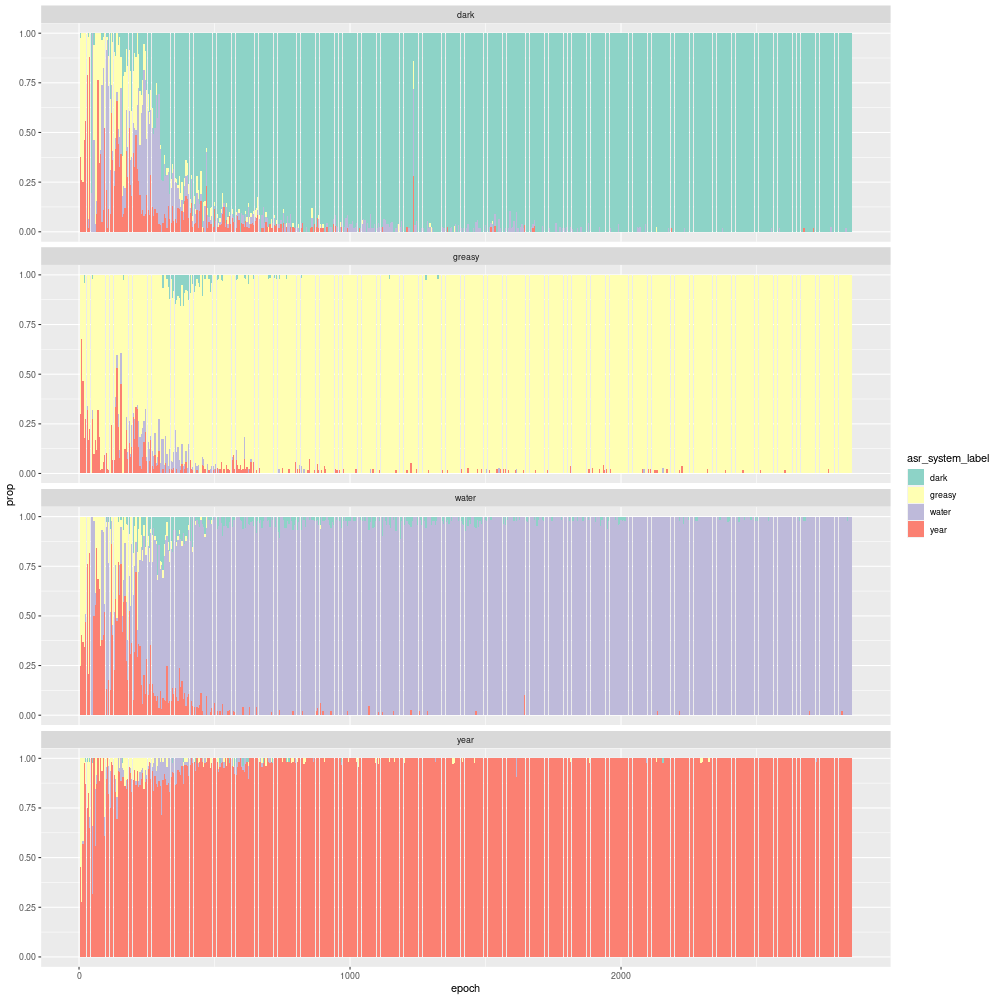

R[write to console]: Error in f(..., self = self) : unused argument (useS4 = FALSE)

/home/stephan/notebooks/ciwganfiwgan-pytorch/gasper-gan-env/lib/python3.8/site-packages/rpy2/robjects/robject.py:123: UserWarning: Invalid call to "show()" in R: Error in f(..., self = self) : unused argument (useS4 = FALSE)

  warnings.warn(f'Invalid call to "show()" in R: {rre}')


o{'data':      human_label  epoch asr_system_label  matches  human_label_total      prop
1           dark     10           greasy       31                 42  0.738095
2           dark     10             year       11                 42  0.261905
3           dark    100             dark        1                 48  0.020833
4           dark    100           greasy        3                 48  0.062500
5           dark    100            water       34                 48  0.708333
...          ...    ...              ...      ...                ...       ...
3759        year    980             year       50                 50  1.000000
3760        year    985             year       56                 56  1.000000
3761        year    990             year       50                 50  1.000000
3762        year    995           greasy        1                 53  0.018868
3763        year    995             year       52                 53  0.981132

[3763 rows x 6 columns], 'layers': o{'Non

In [108]:
%R -w 1000 -h 1000 print(ggplot(rr_agg ) + geom_bar(aes(x = epoch, y = prop, fill=asr_system_label),  stat = "identity" \
) + scale_fill_brewer(palette="Set3") + facet_wrap(~human_label, ncol=1))